# How does the number of people flying between different locations change over time?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Importing the datasets required for Q3

In [2]:
cleaned_dataset = pd.read_csv("C:/Users/94772/OneDrive/Documents/PROG CW - final/cleaned_dataset.csv")
airport = pd.read_csv("C:/Users/94772/OneDrive/Documents/Programming for Data Science coursework/datasets/airports.csv")

## Removing Duplicate Rows from airport data

In [3]:
airport.drop_duplicates(inplace=True)
airport

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


# Total Number of Flights Over Time

## Aggregate the number of flights by origin, destination, year, and month

In [4]:
df = cleaned_dataset.groupby(['Origin', 'Dest', 'Year', 'Month'])['FlightNum'].count().reset_index()

## Convert the year and month columns to datetime format

In [5]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), format='%Y-%m')

## Aggregate the number of flights by year and month

In [6]:
flightsbymonth = df.groupby(['Year', 'Month'])['FlightNum'].sum().reset_index()

## Create a line plot of the total number of flights over time

Text(0.5, 1.0, 'Total Number of Flights Over Time')

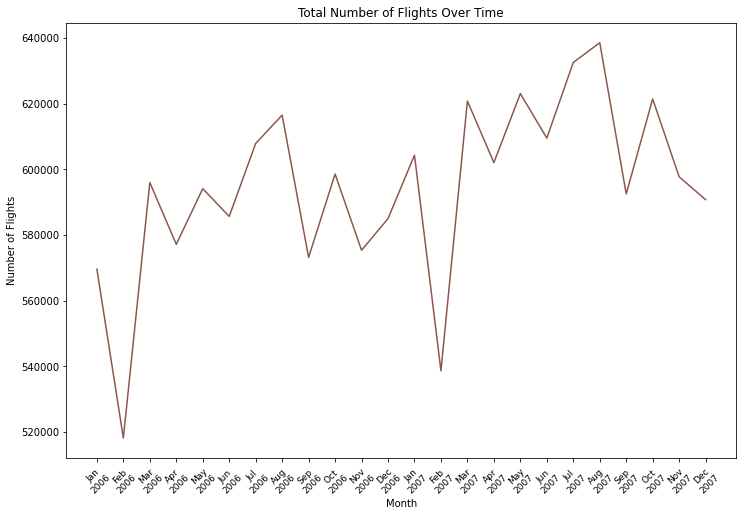

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(flightsbymonth['Year'] + (flightsbymonth['Month'] - 1) / 12, flightsbymonth['FlightNum'], color ="#8c564b")

# Change the x-axis ticks to show month names
month_labels = [calendar.month_abbr[m] for m in range(1, 13)]  
year_labels = flightsbymonth['Year'].unique()  
xticks = [(y + (m-1)/12) for y in year_labels for m in range(1, 13)] 

plt.xticks(xticks, rotation=45, labels=[f"{month_labels[m-1]}\n{y}" for y in year_labels for m in range(1, 13)],fontsize = 9) 
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Total Number of Flights Over Time')

# Number of Flights by Top 5 Airports 

## Merge airport data to get latitute and longitude for each airport

In [8]:
cleaned_dataset = pd.merge(cleaned_dataset, airport[['iata','lat','long']], left_on='Origin', right_on='iata', how='left')
cleaned_dataset

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Total_Delay,iata,lat,long
0,2006,1,11,3,743,745,1024,1018,US,343,...,0,0,0,0,0,0,4,ATL,33.640444,-84.426944
1,2006,1,11,3,1053,1053,1313,1318,US,613,...,0,0,0,0,0,0,-5,ATL,33.640444,-84.426944
2,2006,1,11,3,1915,1915,2110,2133,US,617,...,0,0,0,0,0,0,-23,ATL,33.640444,-84.426944
3,2006,1,11,3,1753,1755,1925,1933,US,300,...,0,0,0,0,0,0,-10,AUS,30.194533,-97.669872
4,2006,1,11,3,824,832,1015,1015,US,765,...,0,0,0,0,0,0,-8,AUS,30.194533,-97.669872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14268923,2007,12,15,6,1558,1605,1749,1736,DL,58,...,0,0,0,0,0,0,6,MCO,28.428889,-81.316028
14268924,2007,12,15,6,1902,1851,2110,2105,DL,59,...,0,0,0,0,0,0,16,ATL,33.640444,-84.426944
14268925,2007,12,15,6,1024,1025,1750,1735,DL,61,...,0,0,0,15,0,0,14,LAX,33.942536,-118.408074
14268926,2007,12,15,6,1353,1315,1658,1622,DL,62,...,0,0,0,0,0,36,74,DFW,32.895951,-97.037200


## Calculate the total number of flights per month for each airport

In [9]:
flights = cleaned_dataset.groupby(['Month', 'Origin']).size().reset_index(name='NumFlights')
flights

,Month,Origin,NumFlights
0,1,ABE,862
1,1,ABI,453
2,1,ABQ,6002
3,1,ABY,219
4,1,ACT,372
...,...,...,...
3520,12,WRG,114
3521,12,XNA,1872
3522,12,YAK,107
3523,12,YKM,61


## Get top 5 airports by number of flights

In [10]:
top_5_airports = flights.groupby('Origin').sum().sort_values(by='NumFlights', ascending=False).head(5).index.tolist()

## Convert the Month column to a string for easier readability

In [11]:
flights['Month'] = flights['Month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar',
                                                     4: 'Apr', 5: 'May', 6: 'Jun',
                                                     7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

## Plot seasonal trends for each airport

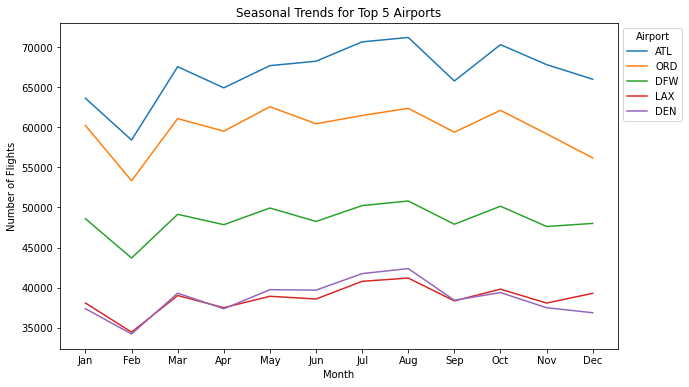

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
for airport in top_5_airports:
    data = flights[flights['Origin'] == airport]
    ax.plot(data['Month'], data['NumFlights'], label=airport)

plt.legend(title='Airport', loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Seasonal Trends for Top 5 Airports')
plt.show()